In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib widget

In [2]:
# Environment

obstacles = [([-3.5, 0], 1.5), ([3.5, 0], 1.5)]
lims = [[-10, 10], [-10, 10]]
goal = np.array([0, 5])
goal_radius = 2

In [3]:
# True reward function
def true_reward(pos):
    reward = -0.01
    
    # Check for goal state
    dist_g = np.linalg.norm(pos - goal,2)
    if dist_g <= goal_radius:
        reward += 20
        
    # Check obstacle collisions
    for obs in obstacles:
        pos_o, rad = obs
        dist_o = np.linalg.norm(pos - pos_o,2)
        if dist_o <= rad:
            reward -= 20
            break
    
    # Check for borders
    if (pos[0] <= lims[0][0] or pos[0] >= lims[0][1]) or (pos[1] <= lims[1][0] or pos[1] >= lims[1][1]):
        reward -= 20
    
    return reward
        

In [27]:
# Generate grid
num_steps = 100
x = np.linspace(lims[0][0]-5, lims[0][1]+5, num_steps, endpoint=True)
y = np.linspace(lims[1][0]-5, lims[1][1]+5, num_steps, endpoint=True)

X, Y = np.meshgrid(x, y)

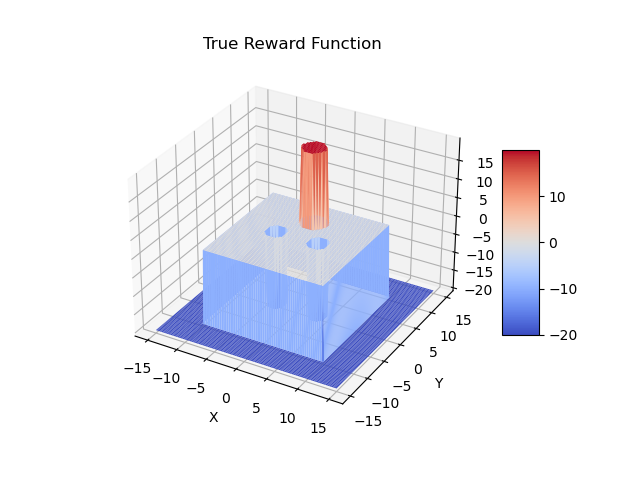

In [28]:
# Plot true reward function
Z_true = np.zeros(X.shape, dtype=float)
for i in range(len(x)):
    for j in range(len(y)):
        Z_true[i, j] = true_reward(np.array([X[i, j], Y[i, j]])) 
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z_true, rstride=1, cstride=1, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('True Reward Function')

plt.show()

In [46]:
# Helper functions
def gaus(x, mu, A, B):
    exponent = -B * (x-mu).dot(x- mu)
    return A * np.exp(exponent)

def sigmoid(x, shift, inv, A, steep):
    sig = 1 / (1 + np.exp(-steep*(x - shift)))
    
    if inv == 0:
        return A*sig
    else:
        return A * (inv - sig)


# Continuous reward function
def cont_reward(pos):
    reward = -0.01
    
    # Goal position
    A_g = 20
    B_g = 9 / (4*goal_radius**2)
    reward += gaus(pos, goal, A_g, B_g)
    
    # Obstacles
    for obs, rad in obstacles:
        A_o = -20
        B_o = 9 / (4*rad**2)
        reward += gaus(pos, np.array(obs), A_o, B_o)
        
    # Borders
    steep = 10
    reward += sigmoid(pos[0], lims[0][0], 1, A_o, steep)
    reward += sigmoid(pos[0], lims[0][1], 0, A_o, steep)
    reward += sigmoid(pos[1], lims[1][0], 1, A_o, steep)
    reward += sigmoid(pos[1], lims[1][1], 0, A_o, steep)
        
    return reward
    
    
    

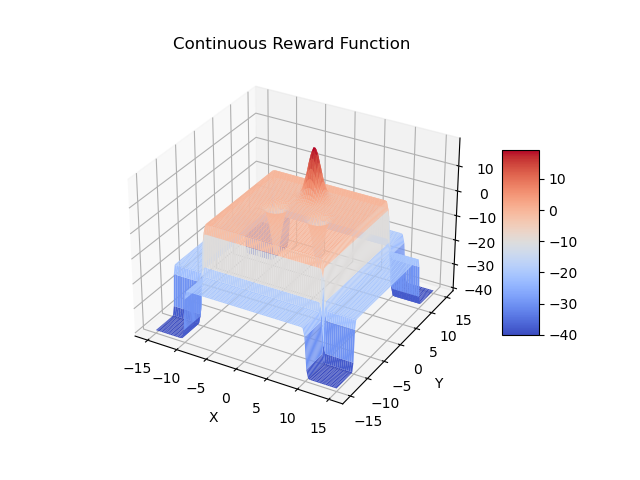

In [47]:
# Plot continuous reward function
Z_cont = np.zeros(X.shape, dtype=float)
for i in range(len(x)):
    for j in range(len(y)):
        Z_cont[i, j] = cont_reward(np.array([X[i, j], Y[i, j]])) 
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z_cont, rstride=1, cstride=1, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Continuous Reward Function')

plt.show()

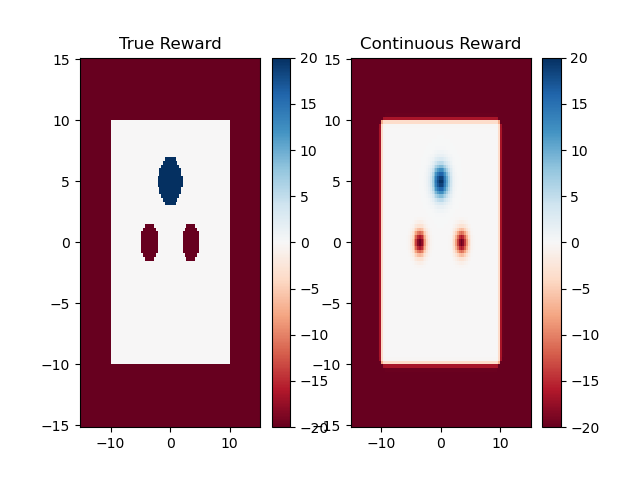

In [48]:
# Plot Heatmaps
fig = plt.figure()
ax1 = fig.add_subplot(121)
c1 = ax1.pcolormesh(X, Y, Z_true, cmap='RdBu', vmin=-20, vmax=20)
ax1.set_title('True Reward')
fig.colorbar(c1, ax=ax1)

ax2 = fig.add_subplot(122)
c2 = ax2.pcolormesh(X, Y, Z_cont, cmap='RdBu', vmin=-20, vmax=20)
ax2.set_title('Continuous Reward')
# set the limits of the plot to the limits of the data
# ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c2, ax=ax2)

plt.show()